[CRQ1]: Does the fare for mile change across NY's borough? We want to discover whether the expenses of a user that enjoys Taxis in one zone is different from those that uses it in another one.

Considering the fare amount:
Compute the price per mile  for each trip.
Run the mean and the standard deviation of the new variable for each borough. Then plot the distribution. What do you see?
Run the t-test among all the possible pairs of distribution of different boroughs.
Can you say that statistically significant differences, on the averages, hold among zones? In other words, are Taxis trip in some boroughs, on average, more expensive than others?

In [73]:
#Libraries
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns 
%matplotlib inline
import matplotlib.pyplot as plt
import functions
import datetime
from scipy.stats import chi2_contingency



In [74]:
# directory path for csv files (dataset from Jan to Jun 2018)
df_names=['data/yellow_tripdata_2018-01.csv','data/yellow_tripdata_2018-02.csv',
          'data/yellow_tripdata_2018-03.csv','data/yellow_tripdata_2018-04.csv',
         'data/yellow_tripdata_2018-05.csv','data/yellow_tripdata_2018-06.csv']

# taxi_zone_lookup.csv file
taxi_zone_lookup = pd.read_csv('data/taxi_zone_lookup.csv')

# names of the boroughs
borough_lst = list(np.unique(taxi_zone_lookup.Borough))


In [75]:
res_df=pd.DataFrame() #list to store parts of dataframe grouped by Borough and payment_type

for i,df_name in enumerate(df_names): #repeating it for every fail(aka month)
        # load the ith dataframe, taking only 2 columns
        df = pd.read_csv(df_name,usecols= ['fare_amount','PULocationID','trip_distance'],nrows=10000)

        # merging it with taxi_zone_lookup file(left-join) 
        df=pd.merge(df,taxi_zone_lookup,how='left',left_on='PULocationID',right_on='LocationID')
        #print(df.isnull().sum())
        
        df['price_per_mile']=df['fare_amount']/df[df.trip_distance>0].dropna().trip_distance
        #res.append(df.groupby(['payment_type','Borough']).count().iloc[:,0]) 
        res_df=res_df.append(df.loc[:,['price_per_mile','fare_amount','trip_distance','Borough']])
#return res_df

In [76]:
res_df.head()

,price_per_mile,fare_amount,trip_distance,Borough
0,6.666667,8.0,1.20,Manhattan
1,3.671875,23.5,6.40,Manhattan
2,4.250000,8.5,2.00,Manhattan
3,7.894737,4.5,0.57,Manhattan
4,3.695652,17.0,4.60,Manhattan


Run the mean and the standard deviation of the new variable for each borough. Then plot the distribution. What do you see?

(0, 50)

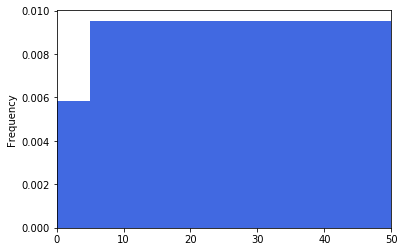

In [70]:
#for ind,bor in enumerate(borough_lst):
bor='Manhattan' 
X=res_df[res_df.Borough==bor]
mean=X.price_per_mile.mean()
std=X.price_per_mile.std()
X.price_per_mile.plot(kind='hist',color='royalblue',density=True,bins=200)
plt.xlim(0,50)

In [66]:
mean

6.705244209990839

In [ ]:
# price per mile